In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
df_vehiculos = pd.read_csv('./MotorAlpes.csv', sep=',', encoding = 'utf-8', index_col=0)

In [4]:
df_vehiculos.shape

(791, 10)

In [11]:
df_vehiculos.sample(10)

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power
76,2013.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,22.90,1248.0,74.00
7423,2014.0,110000.0,Third Owner,Individual,5.0,Diesel,Manual,23.20,1248.0,73.94
1467,2008.0,120000.0,Second Owner,Individual,7.0,Diesel,Manual,11.57,2179.0,138.10
340,2013.0,110000.0,Third Owner,Individual,7.0,Diesel,Manual,20.77,1248.0,88.76
6399,2018.0,50000.0,Second Owner,Individual,5.0,Diesel,Manual,21.19,1396.0,88.73
7714,2016.0,45629.0,First Owner,Trustmark Dealer,5.0,Petrol,Automatic,18.90,1197.0,81.86
2802,NaN,120000.0,NaN,Individual,5.0,Diesel,Manual,19.87,10402.0,83.80
4145,2010.0,77000.0,First Owner,Individual,5.0,Petrol,Manual,18.90,NaN,NaN
6911,2009.0,87000.0,Second Owner,Individual,5.0,Petrol,Manual,13.20,1495.0,94.00
4723,2018.0,142000.0,First Owner,Individual,5.0,Diesel,Manual,14.10,8602.0,147.94


In [6]:
# Podemos ver los tipos de todas la variables.
df_vehiculos.dtypes

year            float64
km_driven       float64
owner            object
seller_type      object
seats           float64
fuel             object
transmission     object
mileage         float64
engine          float64
max_power       float64
dtype: object

In [7]:
# Y hacer una descripción de los datos
df_vehiculos.describe()

,year,km_driven,seats,mileage,engine,max_power
count,764.000000,769.000000,791.00000,769.000000,763.000000,762.000000
mean,2013.816754,70209.823147,5.46397,19.502421,1835.280472,141.170696
std,3.904554,48346.299689,1.00802,4.173028,2179.398466,276.544074
min,1996.000000,2000.000000,4.00000,0.000000,47.000000,1.270000
25%,2011.000000,35000.000000,5.00000,16.520000,1197.000000,68.050000
50%,2015.000000,67000.000000,5.00000,19.330000,1368.000000,83.100000
75%,2017.000000,100000.000000,5.00000,22.540000,1598.000000,104.412500
max,2020.000000,577414.000000,10.00000,37.240000,19140.000000,1997.270000


C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


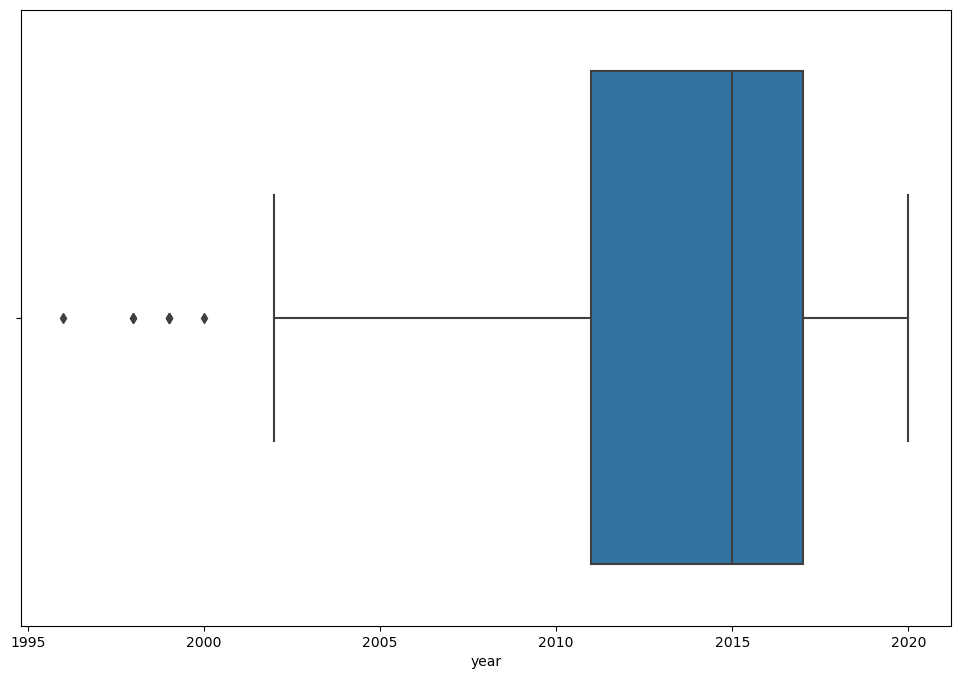

In [25]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="year", data=df_vehiculos, orient="v")

C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


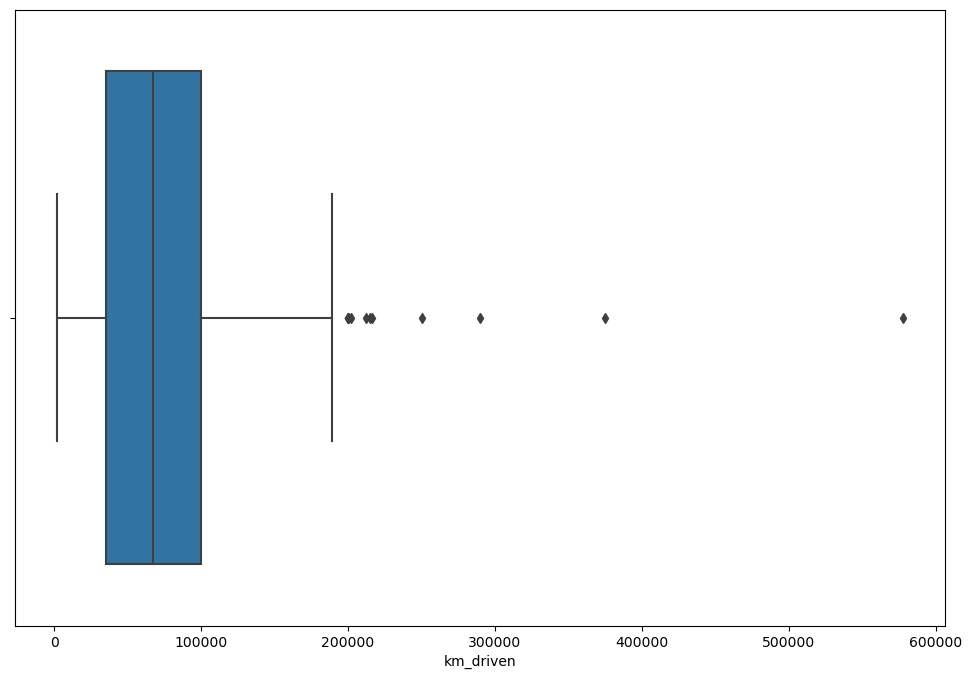

In [26]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="km_driven", data=df_vehiculos, orient="v")

C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


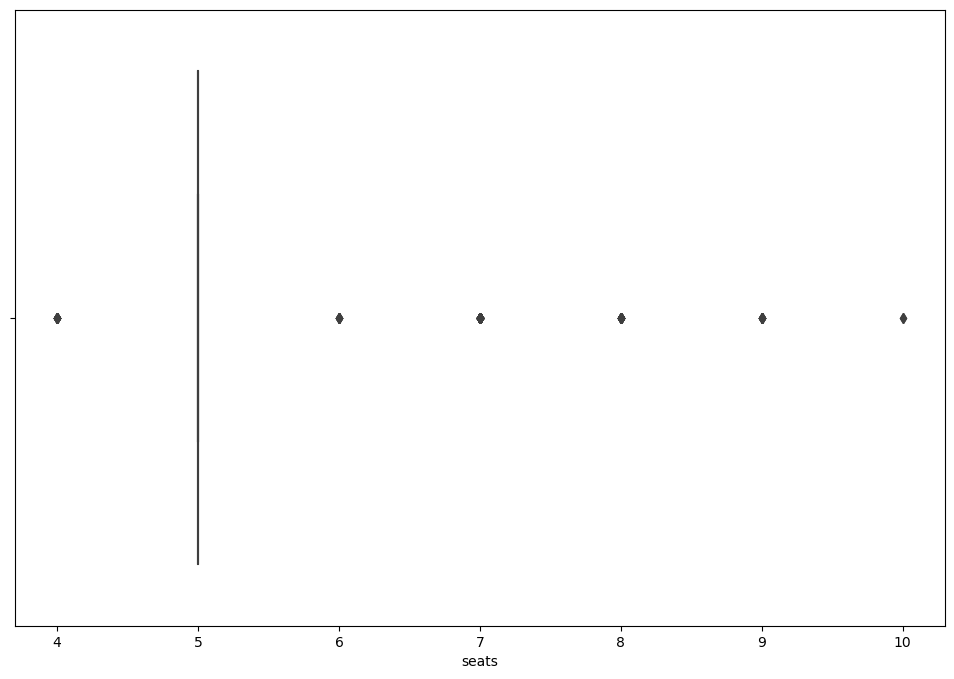

In [27]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="seats", data=df_vehiculos, orient="v")

C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


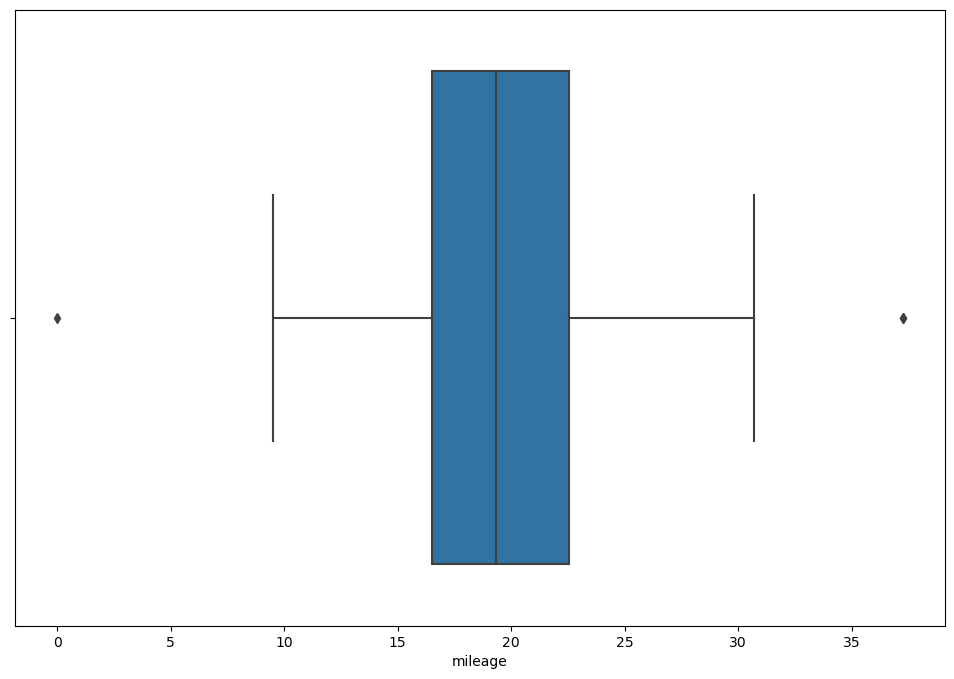

In [28]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="mileage", data=df_vehiculos, orient="v")

C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


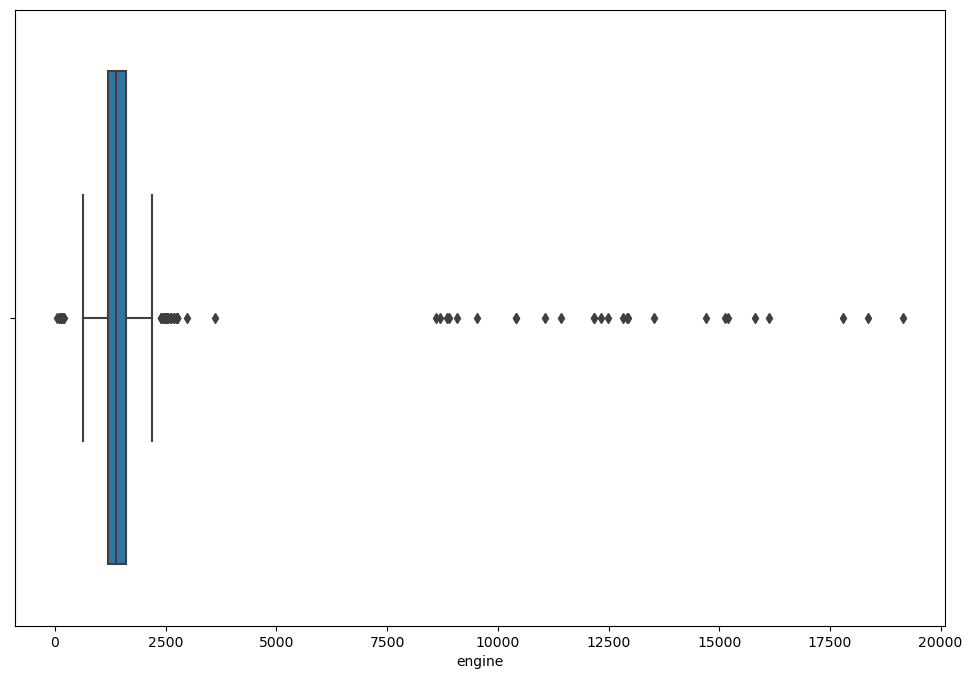

In [29]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="engine", data=df_vehiculos, orient="v")

C:\Users\jefed\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


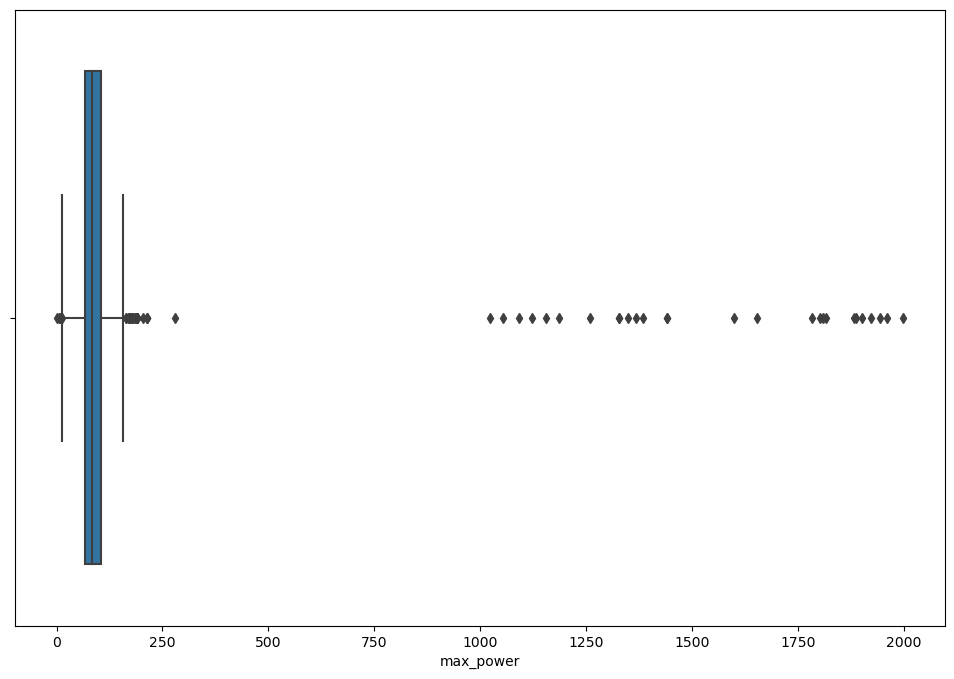

In [30]:
fig=plt.figure(figsize=(12,8))
ax = sns.boxplot(x="max_power", data=df_vehiculos, orient="v")

In [31]:
df_vehiculos.isnull().sum()

year            27
km_driven       22
owner           27
seller_type      0
seats            0
fuel             0
transmission     0
mileage         22
engine          28
max_power       29
dtype: int64

In [32]:
#Limpieza y preparacion de los datos
df_vehiculos_p = df_vehiculos
#Eliminar duplicados
df_vehiculos_p = df_vehiculos_p.drop_duplicates()

df_vehiculos.shape

(791, 10)

In [44]:
year = df_vehiculos['year']
mean_year = year.mean()
print(year)
print(mean_year)

3105    2014.0
4030    2016.0
1656    2014.0
3580    2016.0
5725       NaN
         ...  
2004    2015.0
6357    2007.0
988     2018.0
2339    2011.0
1995    2016.0
Name: year, Length: 791, dtype: float64
2013.8167539267015


In [50]:
for x in year:
  if(x is None):
    x = mean_year
    print(x)

In [51]:
print(year)

3105    2014.0
4030    2016.0
1656    2014.0
3580    2016.0
5725       NaN
         ...  
2004    2015.0
6357    2007.0
988     2018.0
2339    2011.0
1995    2016.0
Name: year, Length: 791, dtype: float64
